In [1]:
!pip install earth2studio[pangu]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gcsfs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.5/300.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.1/343.1 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.5 MB/s e

In [2]:
# from earth2studio.models.px import DLWP
# from earth2studio.models.px.aifs import AIFS
# from earth2studio.models.px.aurora import Aurora
# from earth2studio.models.px.dlesym import DLESyM, DLESyMLatLon
# from earth2studio.models.px.fcn import FCN
# from earth2studio.models.px.fengwu import FengWu
# from earth2studio.models.px.fcn3 import FCN3
from earth2studio.models.px.pangu import Pangu3, Pangu6, Pangu24
from earth2studio.data import GFS
from earth2studio.data import NCAR_ERA5
from earth2studio.io import NetCDF4Backend
from earth2studio.run import deterministic as run

model = Pangu24.load_model(Pangu24.load_default_package())
ds = GFS()
io = NetCDF4Backend("output.nc")

run(["2025-10-02"], 40, model, ds, io)

2025-10-02 12:33:30.166 | INFO     | earth2studio.run:deterministic:75 - Running simple workflow!
2025-10-02 12:33:30.228 | INFO     | earth2studio.run:deterministic:82 - Inference device: cuda


Fetching GFS data:   0%|          | 0/69 [00:00<?, ?it/s]

2025-10-02 12:33:57.064 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20251002/00/atmos/gfs.t00z.pgrb2.0p25.f000 392139898-856990
2025-10-02 12:33:57.068 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20251002/00/atmos/gfs.t00z.pgrb2.0p25.f000 180423867-757480
2025-10-02 12:33:57.071 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20251002/00/atmos/gfs.t00z.pgrb2.0p25.f000 305339076-912444
2025-10-02 12:33:57.074 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20251002/00/atmos/gfs.t00z.pgrb2.0p25.f000 217441724-605445
2025-10-02 12:33:57.077 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20251002/00/atmos/gfs.t00z.pgrb2.0p25.f000 0-998392
2025-10-02 12:33:57.080 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib fil

Fetching GFS data: 100%|██████████| 69/69 [00:05<00:00, 11.99it/s]


2025-10-02 12:34:03.175 | SUCCESS  | earth2studio.run:deterministic:106 - Fetched data from GFS
2025-10-02 12:34:03.188 | INFO     | earth2studio.run:deterministic:136 - Inference starting!



Running inference: 100%|██████████| 41/41 [01:04<00:00,  1.57s/it]

2025-10-02 12:35:07.500 | SUCCESS  | earth2studio.run:deterministic:146 - Inference complete


In [3]:
!ls

output.nc  sample_data


In [4]:
import xarray as xr
ds_pangu = xr.open_dataset('output.nc')
ds_pangu

<xarray.Dataset> Size: 12GB
Dimensions:    (time: 1, lead_time: 41, lat: 721, lon: 1440)
Coordinates:
  * time       (time) datetime64[ns] 8B 2025-10-02
  * lead_time  (lead_time) int64 328B 0 24 48 72 96 120 ... 864 888 912 936 960
  * lat        (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon        (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables: (12/69)
    z1000      (time, lead_time, lat, lon) float32 170MB ...
    z925       (time, lead_time, lat, lon) float32 170MB ...
    z850       (time, lead_time, lat, lon) float32 170MB ...
    z700       (time, lead_time, lat, lon) float32 170MB ...
    z600       (time, lead_time, lat, lon) float32 170MB ...
    z500       (time, lead_time, lat, lon) float32 170MB ...
    ...         ...
    v100       (time, lead_time, lat, lon) float32 170MB ...
    v50        (time, lead_time, lat, lon) float32 170MB ...
    msl        (time, lead_time, lat, lon) float32 170MB ...
    u10m       (time, lead_time, lat, lon) float32 170MB ...
    v10m       (time, lead_time, lat, lon) float32 170MB ...
    t2m        (time, lead_time, lat, lon) float32 170MB ...

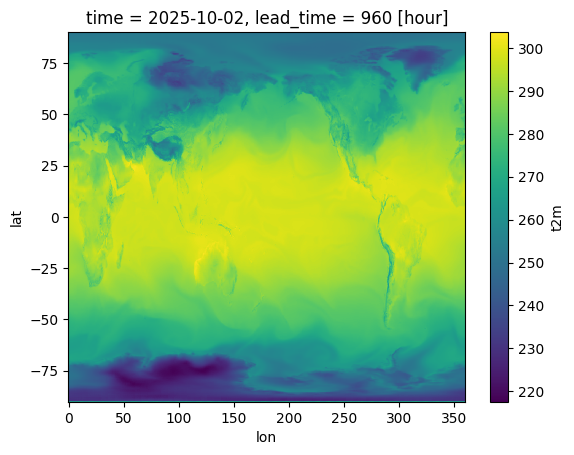

In [5]:
ds_pangu.t2m.isel(time=0, lead_time=40).plot()